<a href="https://colab.research.google.com/github/qlqhdl101/Color-photo-image-classification/blob/main/%EC%BB%AC%EB%9F%AC%EC%82%AC%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.zip to Dataset.zip


In [ ]:
!unzip Dataset.zip -d 'Dataset'

Archive:  Dataset.zip
replace Dataset/test_set/cats/cat.4014.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
pip install keras --upgrade

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/main.py", line 45, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/__init__.py", line 96, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/loca

In [ ]:
pip install numpy

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))  
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(128,activation='relu'))   # Dense(output weight link number, activation function)
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import  display
from PIL import Image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/Dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/Dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 1005 images belonging to 2 classes.
Found 316 images belonging to 2 classes.


In [ ]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 1000000,
                         epochs = 100000,
                         validation_data = test_set,
                         validation_steps = 316)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100000
1000000/1000000 [==============================] - 5s 5us/step - loss: 0.4386 - accuracy: 0.8408 - val_loss: 0.8323 - val_accuracy: 0.6139


  => predict =  1.0 , class =  dog


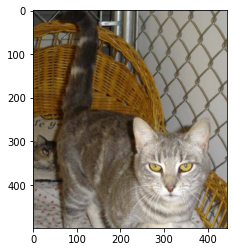

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
test_image = image.load_img('cat.4375.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] >= 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'
origin_image = image.load_img('cat.4375.jpg')
plt.imshow(origin_image)
print('  => predict = ', result[0][0], ', class = ', prediction)

In [ ]:
output = classifier.predict_generator(test_set, steps=5)
print(test_set.class_indices)
print(output)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


{'cats': 0, 'dogs': 1}
[[0.8658539 ]
 [0.89694   ]
 [0.84162974]
 [0.87663054]
 [0.8230944 ]
 [0.826818  ]
 [0.8361545 ]
 [0.8855065 ]
 [0.845857  ]
 [0.8682096 ]
 [0.80013424]
 [0.86008775]
 [0.84301853]
 [0.86711526]
 [0.8571775 ]
 [0.8895283 ]
 [0.7491057 ]
 [0.8612154 ]
 [0.8111246 ]
 [0.8577324 ]
 [0.8905036 ]
 [0.81203514]
 [0.89000165]
 [0.8608198 ]
 [0.87500185]
 [0.84950095]
 [0.8388165 ]
 [0.9094029 ]
 [0.8125801 ]
 [0.92361915]
 [0.88372815]
 [0.78119373]
 [0.9167371 ]
 [0.87039596]
 [0.9039225 ]
 [0.8288552 ]
 [0.867973  ]
 [0.81819177]
 [0.84585214]
 [0.8755732 ]
 [0.8307897 ]
 [0.8891149 ]
 [0.87034744]
 [0.8424008 ]
 [0.88056874]
 [0.80902016]
 [0.8755462 ]
 [0.87515116]
 [0.8410375 ]
 [0.84232664]
 [0.83144355]
 [0.8015337 ]
 [0.89655304]
 [0.8433281 ]
 [0.8606829 ]
 [0.86971724]
 [0.84946465]
 [0.82544523]
 [0.7444396 ]
 [0.8815151 ]
 [0.90931284]
 [0.8591026 ]
 [0.7642801 ]
 [0.9509609 ]
 [0.8904807 ]
 [0.8470795 ]
 [0.87304556]
 [0.8526163 ]
 [0.88404775]
 [0.9002112